## Assignment Title : Lending Club Case Study

Group : Nachiket Shembekar, Punith Nagaraju

Group Facilitator : Nachiket

### Objective

As part of Lending Club, a consumer finance company, identify risky loan applicants who are likely to default in future. This analysis is to be done using EDA over historical data available of all loans issued through the time period 2007 to 2011.

#### Overall Approach for Solution

1. Data Collection


2. Data Cleaning

    a. Analysis of columns and elimination of redundant, irrelevant or less meaningful ones in perspective of the solution.
    
    b. Elimination of irrelevant rows.
    
    c. Data Type conversions if/as needed.
    
    d. Data standardization, replacement of missing values if/as needed.
        
    e. Defining derived columns to enhance the analysis.
    
    
3. Exploratory Data Analysis (EDA)

    a. Univariate Analysis
    
    b. Bivariate Analysis

##### Importing the necessary Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Increase the number of rows & columns being displayed for better clarity and analysis.
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)

##### Step 1 : Data Collection

In [2]:
# Read the loan.csv file. It's assumed that the file is already loaded in Jupyter notebook, hence only file name is mentioned.
#include low_memory=False to avoid DtypeWarning.

loan_ds = pd.read_csv('loan.csv',low_memory=False) 

In [3]:
# Before starting with Data cleaning, let's evaluate the dataset. Shape function will provide total rows & columns.
loan_ds.shape

(39717, 111)

##### Step 2 : Data Cleaning

#####  a. Analysis of columns and elimination of redundant, irrelevant or less meaningful ones in perspective of the solution.

  1. Looking at the dataset, we can see that 50+ columns towards the end either have null or zero values. We will start eliminating such columns, which are not going to provide any information during the analysis.
  2. Columns such as id, member_id have no duplicate rows, i.e. unique values for each row. Hence, these also won't help in segmentation and analysis, thus to be removed. Columns such as 'initial_list_status' have only 1 value and should be removed for the same reason.
  3. Text columns from which it's difficult to extract any intelligence should also be removed.
  4. Any additional columns, with the help of Data dictionary, which are irrelevant for the analysis.

In [4]:
''' 
1. Removal of null columns.

Identify null values based on Percentage and display all columns with null values.
Columns with 100% null values should definitely be removed. 
Also, columns having more than 60% null values such as 'mths_since_last_delinq' will also not be very useful in the 
analysis, and thus should be removed.

'''
#Remove columns with 'all' null values to begin with.
loan_ds.dropna(axis = 1, how = 'all', inplace = True)
loan_ds.shape

(39717, 57)

In [5]:
loan_ds_null_pcnt = round(loan_ds.isnull().sum()*100/len(loan_ds.index),2)
loan_ds_null_pcnt[loan_ds_null_pcnt>0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [6]:
loan_ds.drop(loan_ds_null_pcnt[loan_ds_null_pcnt > 30 ].index, axis=1, inplace=True)
loan_ds.shape

## There are columns with small percentage of null values. 
## These columns will be retained and the null values will be replaced in subsequent steps.

(39717, 53)

In [7]:
''' 
2. Removal of columns based on unique values

We need columns whose values can be referred for categorization or segmentations.
Columns with only one unique value or with all unique values (39717) will not be useful for the analysis.

'''
loan_ds.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [8]:
# Drop columns with one unique value
loan_ds.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [9]:
# Drop columns with all (39717) unique values
loan_ds.drop(['url', 'member_id', 'id'], axis=1, inplace=True)

In [10]:
loan_ds.shape

(39717, 41)

In [11]:
loan_ds.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp           

In [12]:
loan_ds.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [13]:
''' 
3. Removal of other text columns.

Remove text columns 'emp_title', 'title' which do not give any additional intelligence to analysis
'''
loan_ds.drop(['emp_title', 'title'], axis=1, inplace=True)

In [14]:
''' 
4. Columns based on Data Dictionary Analysis

Based on the description in Data dictionary as well seeing at values in the dataset, 
following columns may not be relevant to further analysis of identifying the defaulters' criteria.

 zip_code, addr_state : There shouldn't be any correlation for defaulters based on their location/address.
 recoveries, collection_recovery_fee : Suggest actions 'after' the loan funding
 out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_amnt, total_rec_int, total_rec_prncp, total_rec_late_fee : Related to the amount received so far (principal/interest)
 last_credit_pull_d, last_pymnt_d : Irrelevant date fields
  : 

'''
loan_ds.drop(['zip_code', 'addr_state','recoveries', 'collection_recovery_fee','total_rec_int', 'total_rec_prncp', 'total_rec_late_fee','last_credit_pull_d', 'last_pymnt_d','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','last_pymnt_amnt'], axis=1, inplace=True)

In [15]:
loan_ds.shape

(39717, 25)

####  Revised number of columns have reduced to 25, which is 23% of original count (111)

In [16]:
list(loan_ds.columns)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies']

#####  b. Elimination of irrelevant rows.

In [17]:
'''
The primary objective is to analyze risky loan applicants, for which loan_status = "Charged Off".
Other values of loan_status are 'Fully Paid' and 'Current'.

Those customers having loan_status = 'Current' may not add value to this analysis. 
Some of these customer 'may' default, but there won't be any conclusive analysis feasible for these. 
Hence, they should be ommitted.

Other value 'Fully Paid' is the desirable scenario and that data will be required to compare with 'Charged Off' cases.

'''
loan_ds = loan_ds[loan_ds.loan_status != 'Current']

In [18]:
loan_ds.shape

(38577, 25)

In [19]:
# 'earliest_cr_line' is a date field which seems to have inconsistent values.
# The loan data is between 2007 & 2011, hence it's logical to have earliest_cr_line on or before these dates

##### c. Data Type conversions if/as needed.

In [20]:
loan_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                

In [21]:
## Convert columns containing dates into datetime
loan_ds['issue_d'] = pd.to_datetime(loan_ds.issue_d, format='%b-%y')
loan_ds['earliest_cr_line'] = pd.to_datetime(loan_ds.earliest_cr_line, format='%b-%y')

In [22]:
loan_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  object        
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            37544 non-null  object        
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status     

In [23]:
# the formats of both the columns have changed to datetime as expected.

loan_ds[loan_ds['earliest_cr_line'].dt.year>2011]

# However, we notice that there multiple rows in 'earliest_cr_line' column 
## where the year is higher than 2011, which is incorrect.

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
1576,21000,21000,20875.000000,36 months,7.51%,653.33,A,A3,NaN,MORTGAGE,49200.00,Verified,2011-12-01,Fully Paid,credit_card,27.02,0,2062-09-01,1,8,0,14491,19.70%,15,0.0
1764,5500,5500,5500.000000,36 months,7.51%,171.11,A,A3,4 years,RENT,63000.00,Verified,2011-12-01,Fully Paid,other,5.56,2,2068-09-01,0,6,0,6981,20.10%,15,0.0
3274,5000,5000,5000.000000,36 months,12.69%,167.73,B,B5,10+ years,MORTGAGE,72000.00,Source Verified,2011-11-01,Fully Paid,vacation,7.75,0,2067-09-01,1,5,0,4477,32.20%,25,0.0
3349,21000,21000,21000.000000,36 months,12.69%,704.45,B,B5,10+ years,MORTGAGE,267000.00,Source Verified,2011-11-01,Fully Paid,small_business,8.87,0,2065-02-01,2,10,0,51942,36.80%,27,0.0
3403,15000,15000,14900.000000,60 months,16.77%,370.94,D,D2,< 1 year,MORTGAGE,58000.00,Verified,2011-11-01,Charged Off,debt_consolidation,22.08,0,2067-06-01,0,11,0,17700,89.40%,18,0.0
3595,35000,35000,34773.917180,60 months,15.96%,850.39,C,C5,10+ years,MORTGAGE,102158.00,Verified,2011-11-01,Fully Paid,major_purchase,14.61,0,2067-08-01,1,24,0,93973,35.20%,55,0.0
3976,5000,5000,5000.000000,36 months,6.03%,152.18,A,A1,NaN,OWN,25000.00,Verified,2011-11-01,Fully Paid,debt_consolidation,29.86,0,2063-12-01,0,12,0,22141,14.40%,27,0.0
4426,12000,12000,11925.000000,60 months,14.27%,280.91,C,C2,NaN,MORTGAGE,80000.00,Not Verified,2011-11-01,Fully Paid,debt_consolidation,5.20,0,2068-09-01,2,14,0,4614,5.20%,51,0.0
4435,10000,10000,10000.000000,36 months,6.03%,304.36,A,A1,NaN,OWN,50000.00,Source Verified,2011-11-01,Fully Paid,debt_consolidation,13.18,0,2068-09-01,0,11,0,7054,10.80%,23,0.0
4478,6000,6000,6000.000000,36 months,6.03%,182.62,A,A1,10+ years,MORTGAGE,96000.00,Not Verified,2011-10-01,Fully Paid,car,23.80,0,2063-03-01,0,11,0,13726,32%,27,0.0


In [24]:
## To fix this, we will update the year of 'earliest_cr_line' to the 'mode' value of rows with valid years (i.e. < 2011).

earliest_cr_line_mode_year=int(round(loan_ds[loan_ds['earliest_cr_line'].dt.year<=2011]['earliest_cr_line'].dt.year.mode(),0))
earliest_cr_line_mode_year

2000

In [25]:
## The average year is 1997, which we will consider for all the rows with dates > 2011.
loan_ds['earliest_cr_line'] = loan_ds['earliest_cr_line'].apply(lambda x: x.replace(year = earliest_cr_line_mode_year) if x.year>2011 else x)

In [26]:
loan_ds[loan_ds['earliest_cr_line'].dt.year>2011]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies


##### d. Data standardization, replacement of missing values if/as needed.

In [27]:
## We had previously calculated null/missing values in the dataset. The revised null percentage is as below

loan_ds_null_pcnt = round(loan_ds.isnull().sum()*100/len(loan_ds.index),2)
loan_ds_null_pcnt[loan_ds_null_pcnt>0]

emp_length              2.68
revol_util              0.13
pub_rec_bankruptcies    1.81
dtype: float64

In [28]:
## emp_length - We can follow approach similar to 'earliest_cr_line', where the missing values were filled in by mode value.
## revol_util & pub_rec_bankruptcies - '0%' and '0' are valid values. As per Data dictionary definition, these seem to be 
## fitting replacements for null/missing values

loan_ds.emp_length.fillna(loan_ds.emp_length.mode()[0], inplace = True)
loan_ds.emp_length = pd.to_numeric(loan_ds.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loan_ds.revol_util.fillna('0%', inplace = True)
loan_ds.pub_rec_bankruptcies.fillna(0, inplace = True)

In [29]:
## Validate if all the null/missing values are replaced

loan_ds_null_pcnt = round(loan_ds.isnull().sum()*100/len(loan_ds.index),2)
loan_ds_null_pcnt[loan_ds_null_pcnt>0]

Series([], dtype: float64)

In [30]:
## As additional formatting, the '%' symbol should be removed from the columns int_rate & revol_util.
## Upon this, they both can be treated as float values.
## Also, remove leading spaces from the column 'term'

loan_ds['int_rate'] = loan_ds.int_rate.str.strip('%').astype(float)
loan_ds['revol_util'] = loan_ds.revol_util.str.strip('%').astype(float)
loan_ds['term'] = loan_ds.term.str.strip()

In [31]:
## Convert 'term' into numeric by removing the string 'months'
loan_ds[['term','tmp']] = loan_ds['term'].str.split(' ',expand=True)
loan_ds.drop(['tmp'],axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,0,2004-11-01,3,9,0,7963,28.3,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,home_improvement,11.33,0,1990-11-01,0,13,0,7274,13.1,40,0.0
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,credit_card,6.40,1,1986-12-01,1,6,0,8847,26.9,9,0.0
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,debt_consolidation,2.30,0,1998-10-01,0,11,0,9698,19.4,20,0.0
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,other,3.72,0,1988-11-01,0,17,0,85607,0.7,26,0.0


In [32]:
loan_ds['term']= loan_ds['term'].apply(pd.to_numeric)

##### e. Defining derived columns to enhance the analysis.

In [33]:
## From the 2 date fields issue_d & earliest_cr_line, we can create additional derived columns for year and month.

loan_ds['issue_d_year'] = loan_ds.issue_d.dt.year
loan_ds['issue_d_month'] = loan_ds.issue_d.dt.strftime('%b')

loan_ds['earliest_cr_line_year'] = loan_ds.earliest_cr_line.dt.year
loan_ds['earliest_cr_line_month'] = loan_ds.earliest_cr_line.dt.strftime('%b')

In [34]:
loan_ds.shape

(38577, 30)

In [35]:
loan_ds.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,earliest_cr_line_year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,5.076445,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,48.639653,22.052648,0.042694,2010.309070,1996.682350
std,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,3.602917,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,28.400460,11.425861,0.202809,0.882658,6.649186
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2007.000000,1969.000000
25%,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,25.100000,13.000000,0.000000,2010.000000,1993.000000
50%,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,4.000000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,49.000000,20.000000,0.000000,2011.000000,1998.000000
75%,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,72.200000,29.000000,0.000000,2011.000000,2001.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000,2011.000000,2008.000000


In [36]:
loan_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  int64         
 1   funded_amnt             38577 non-null  int64         
 2   funded_amnt_inv         38577 non-null  float64       
 3   term                    38577 non-null  int64         
 4   int_rate                38577 non-null  float64       
 5   installment             38577 non-null  float64       
 6   grade                   38577 non-null  object        
 7   sub_grade               38577 non-null  object        
 8   emp_length              38577 non-null  int64         
 9   home_ownership          38577 non-null  object        
 10  annual_inc              38577 non-null  float64       
 11  verification_status     38577 non-null  object        
 12  issue_d                 38577 non-null  dateti

In [37]:
loan_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  int64         
 1   funded_amnt             38577 non-null  int64         
 2   funded_amnt_inv         38577 non-null  float64       
 3   term                    38577 non-null  int64         
 4   int_rate                38577 non-null  float64       
 5   installment             38577 non-null  float64       
 6   grade                   38577 non-null  object        
 7   sub_grade               38577 non-null  object        
 8   emp_length              38577 non-null  int64         
 9   home_ownership          38577 non-null  object        
 10  annual_inc              38577 non-null  float64       
 11  verification_status     38577 non-null  object        
 12  issue_d                 38577 non-null  dateti

##### Step 3 : EDA

Prior to the analysis, correlation can be checked to give overall understanding. We will use clustermap for the same.

In [38]:
## Before correlation check, we will need to define numerical column that will represent 'loan_status'.

## Following values can be assigned to a new column, based on loan_status
## 1 - Charged Off, 0 - Fully Paid

loan_ds['loan_status_flag'] = loan_ds['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

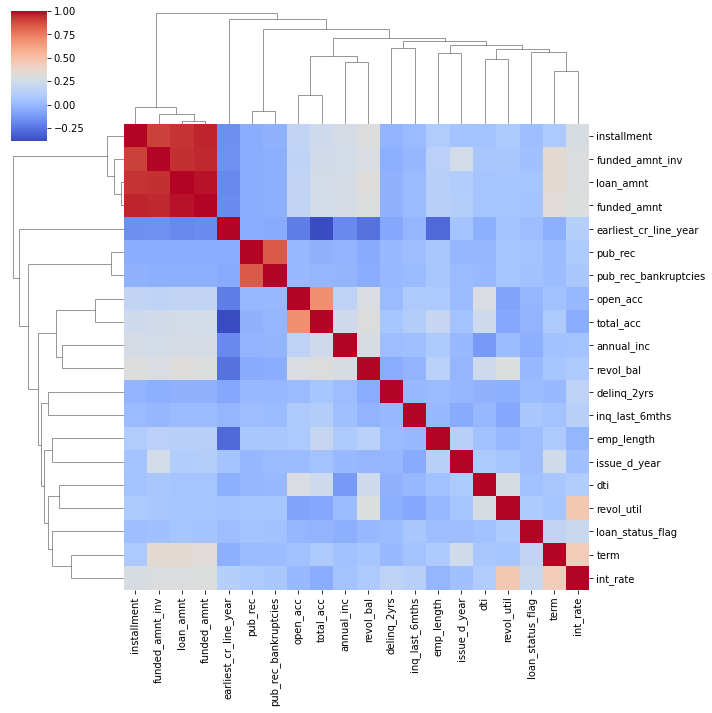

In [39]:
sns.clustermap(data=loan_ds.corr(), cmap="coolwarm", figsize=(10,10))
plt.show()

In the above map, columns marked in warm (i.e. shades of red) colors are closely correlated as opposed to those which are designated by cool (i.e. blue shades). funded_amnt, installment, funded_amnt_inv & loan_amnt have very high correlation with each other. When correlated to the loan_status_flag, we see correlation with few fields that we will analyze now.

#### a. Univariate Analysis

In [40]:
## As we are going to analyze multiple columns, we will create function below that will can be reutilized.
## The function includes plotting histogram as well as Box plot.

def Univar_Analysis_Hist_Box(column_name, title): 
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    
    #Build Histogram
    
    sns.distplot(a=column_name, rug=True)
    plt.subplot(1,2,2)
    
    #Build Box plot
    sns.boxplot(data=column_name)
    
    #Single title for both subplots.
    plt.suptitle(title)
    plt.show()
    print("\n\nMedian : " + str(column_name.median()) + "\nMean : " + str(column_name.mean()))

## Defining function specifically for analysis of 'Charged Off' rows
def Univar_Analysis_Count_Charged_Off(column_name,Order=None,Hue=None):
    fig, ax = plt.subplots(figsize=(20,7))
    sns.set_palette('colorblind')
    sns.countplot(x = column_name, data = loan_ds[loan_ds.loan_status == 'Charged Off'], order=Order, hue=Hue)

### Columns with Numeric values

#### 1. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

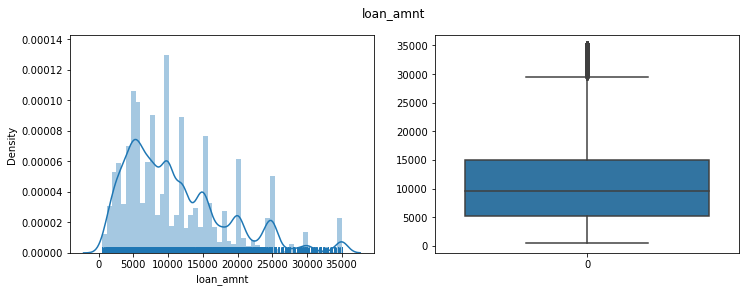



Median : 9600.0
Mean : 11047.02542966016


In [41]:
Univar_Analysis_Hist_Box(column_name = loan_ds.loan_amnt, title = "loan_amnt")

Observation : Highest number of applicants took loan around 10,000 which is between median and mean. Statistics show that most of the applicants have loan amount less than 15000.

#### 2. Installment - The monthly payment owed by the borrower if the loan originates.

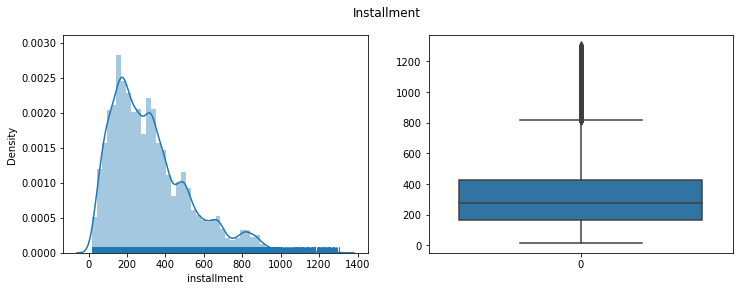



Median : 277.86
Mean : 322.46631801332103


In [42]:
Univar_Analysis_Hist_Box(column_name = loan_ds.installment, title = "Installment")

Observation : Majority of applicants have installment amount less than 500, which could be because of lower loan amount.

#### 3. funded_amnt - The total amount committed to that loan at that point in time.

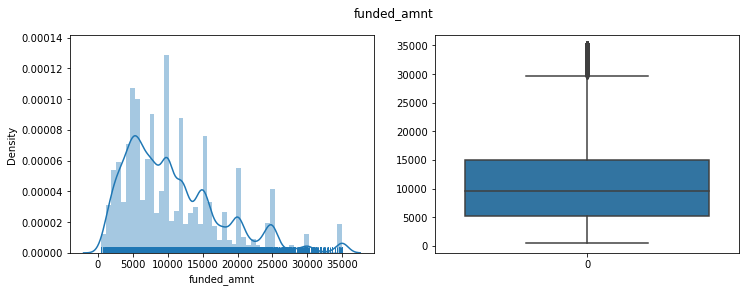



Median : 9550.0
Mean : 10784.058506363896


In [43]:
Univar_Analysis_Hist_Box(column_name = loan_ds.funded_amnt, title = "funded_amnt")

Observation : The funded amount statistics are similar to loan amount. This shows that almost in all the cases, complete amount is funded as requested (or approved by the intermediate organization before investers funded).

#### 4. dti	: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

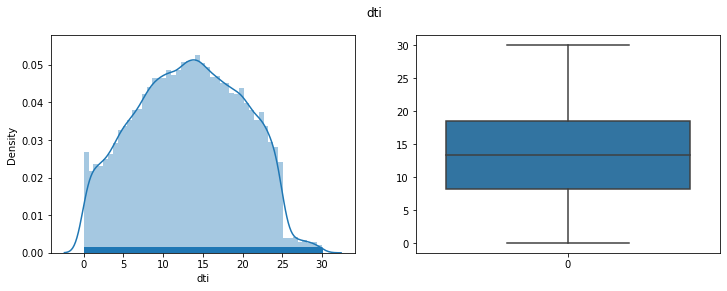



Median : 13.37
Mean : 13.272727013505502


In [44]:
Univar_Analysis_Hist_Box(column_name = loan_ds.dti, title = "dti")

Observation : Loans are funded to applicants having mean/median DTI around 13. No applicants have dti greater than 30, and the graph follows nearly ideal normal distribution.

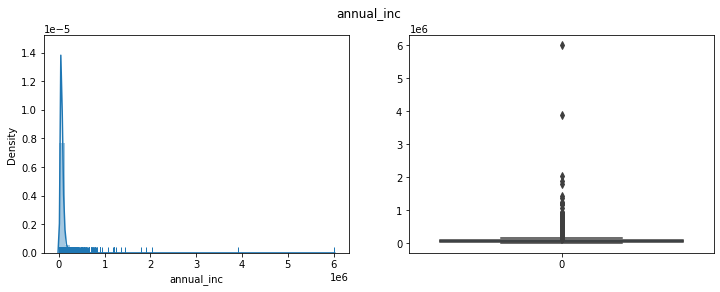



Median : 58868.0
Mean : 68777.97368120909


In [45]:
Univar_Analysis_Hist_Box(column_name = loan_ds.annual_inc, title = "annual_inc")

High presence of outliers in this graph and will require elimination. 

In [46]:
quantile_info = loan_ds.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [47]:
loan_ds = loan_ds[loan_ds.annual_inc <= loan_ds['annual_inc'].quantile(0.95)]

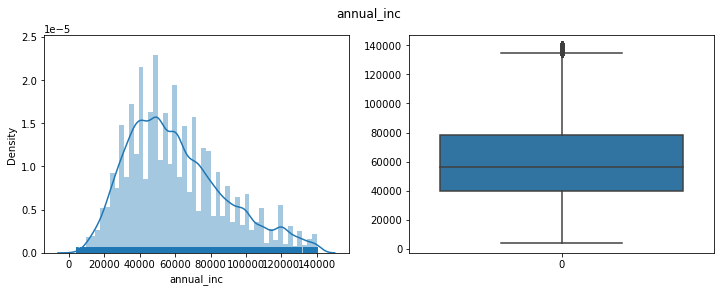



Median : 56000.0
Mean : 60855.75162055979


In [48]:
Univar_Analysis_Hist_Box(column_name = loan_ds.annual_inc, title = "annual_inc")

Observation : Annual incomes of more than 50% applicants is less than 60,000. This suggests people in lower income groups struggling to repay the loan in time.

#### The above analysis of numeric values has provided some insights. We will later try to perform 'binning' on some of these to extract more information. Before then, we can analyze columns with Non-numeric values.

### Columns with Non-Numeric values

#### 1. purpose

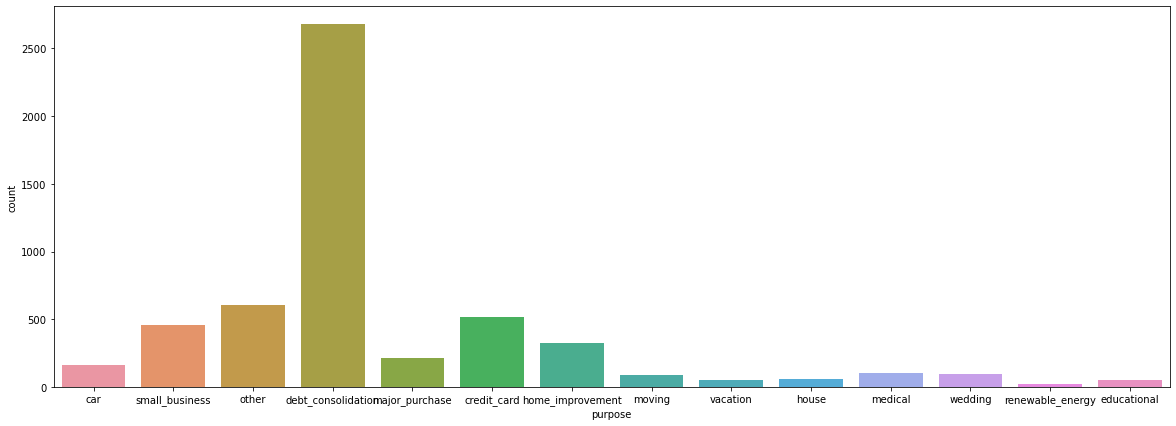

In [49]:
Univar_Analysis_Count_Charged_Off(column_name='purpose')

Observation : Highest number of 'Charged Off' applicants have purpose of 'Debt consolidation', which is an important factor. Other major purposes are credit_card, small_business and others.

#### 2. Grade

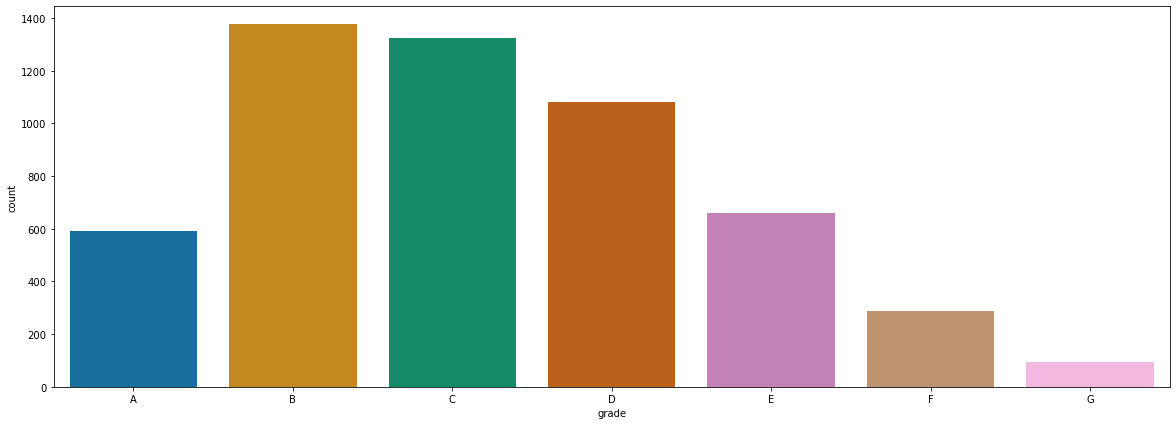

In [50]:
Univar_Analysis_Count_Charged_Off(column_name='grade', Order=['A','B','C','D','E','F','G'])

Observation : Higher concentration of 'Charged Off' applicants in the grades B, C, D.

#### 3. home_ownership

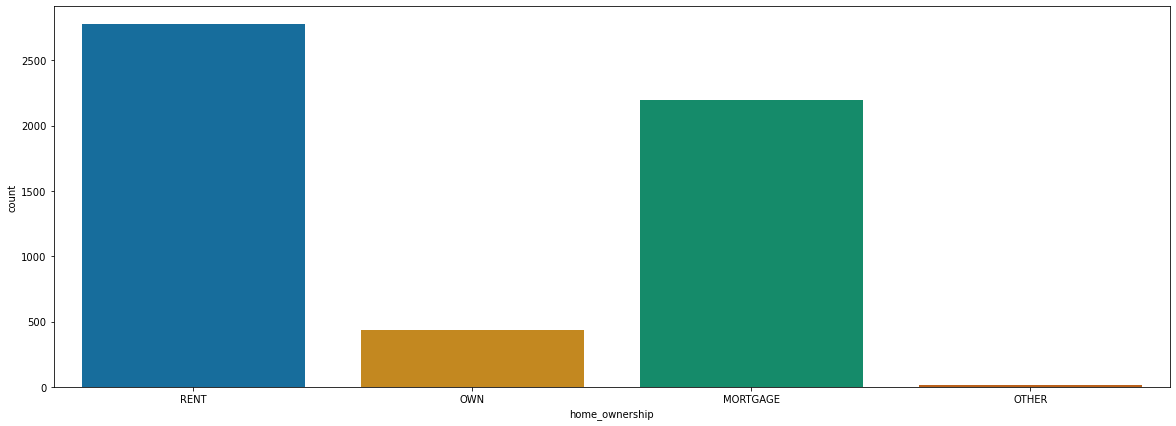

In [51]:
Univar_Analysis_Count_Charged_Off(column_name='home_ownership')

Observation : Higher concentration of 'Charged Off' applicants who are either renting the home or have mortgage. This is logical as it shows important financial commitments that are impacting the loan repayment.

### Binning Procedure - Columns with Numeric values, which are to be analyzed in groups

For the columns with numeric values, we can try analysis via grouping.

int_rate - Interest Rate on the loan

emp_length - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

annual_inc - The self-reported annual income provided by the borrower during registration.

dti	: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

open_acc - The number of open credit lines in the borrower's credit file.

issue_d_year (Derived Column) - Year when the loan was funded

earliest_cr_line_year (Derived Column) - The year the borrower's earliest reported credit line was opened

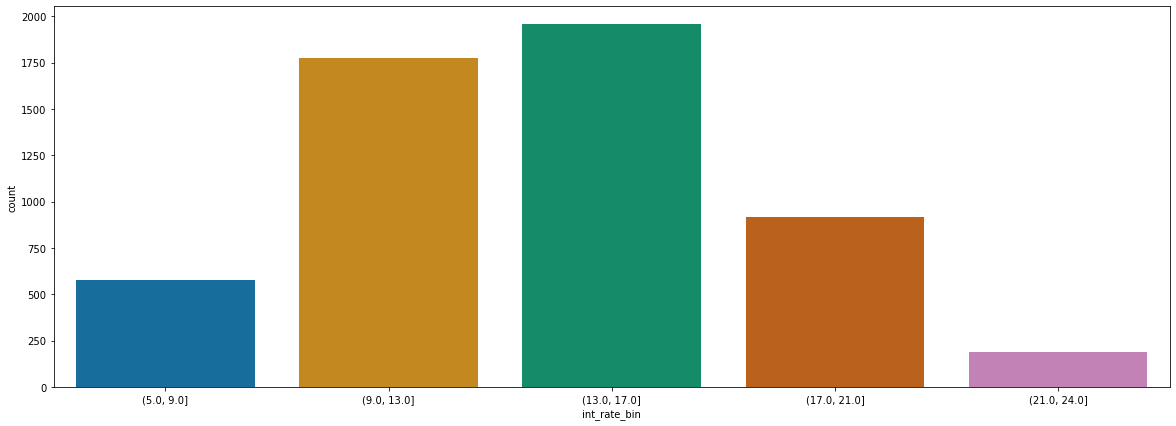

In [52]:
loan_ds['int_rate_bin'] = pd.cut(loan_ds['int_rate'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='int_rate_bin')

Observation : Higher concentration of 'Charged Off' applicants when the interest rate is in the range of 13%-17%. Lower concentration as the interest rate goes up, indicating either resistance from the borrower or hesitation from invester due to applicant's credibility.

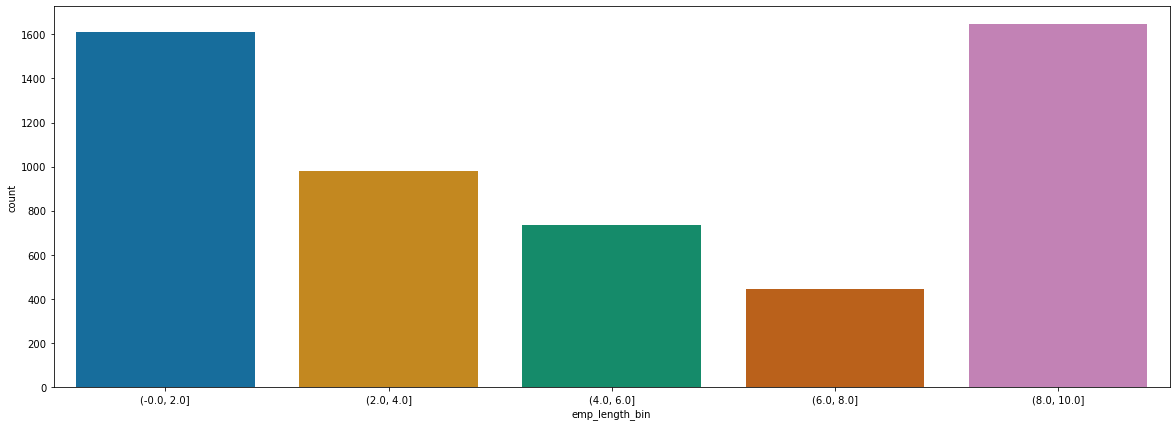

In [53]:
loan_ds['emp_length_bin'] = pd.cut(loan_ds['emp_length'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='emp_length_bin')

Observation : Higher concentration of 'Charged Off' applicants in the lower as well as higher emp_length. It's important to note that the higher emp_lengh (10+ years) also contain the null rows as part of Data standardization, and this data may not prove the impact of emp_length on the defaulting.

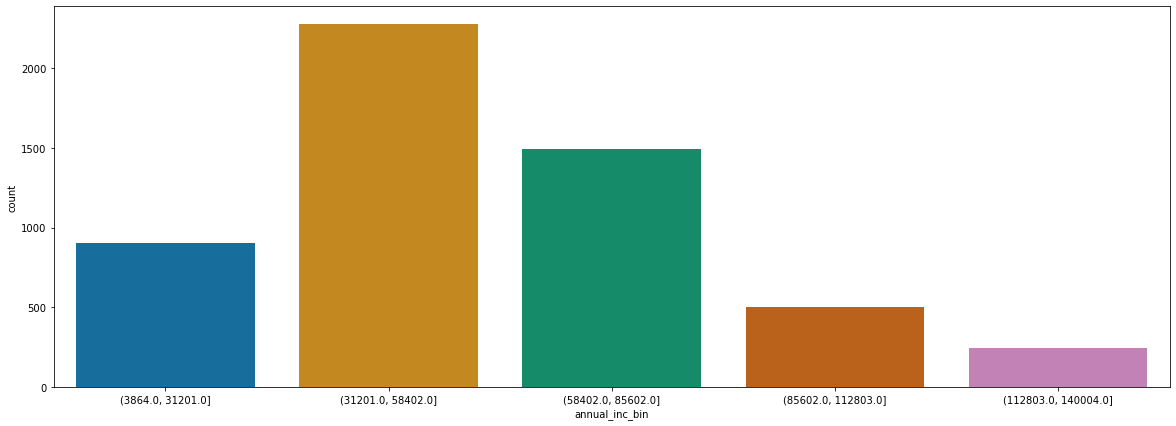

In [54]:
loan_ds['annual_inc_bin'] = pd.cut(loan_ds['annual_inc'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='annual_inc_bin')

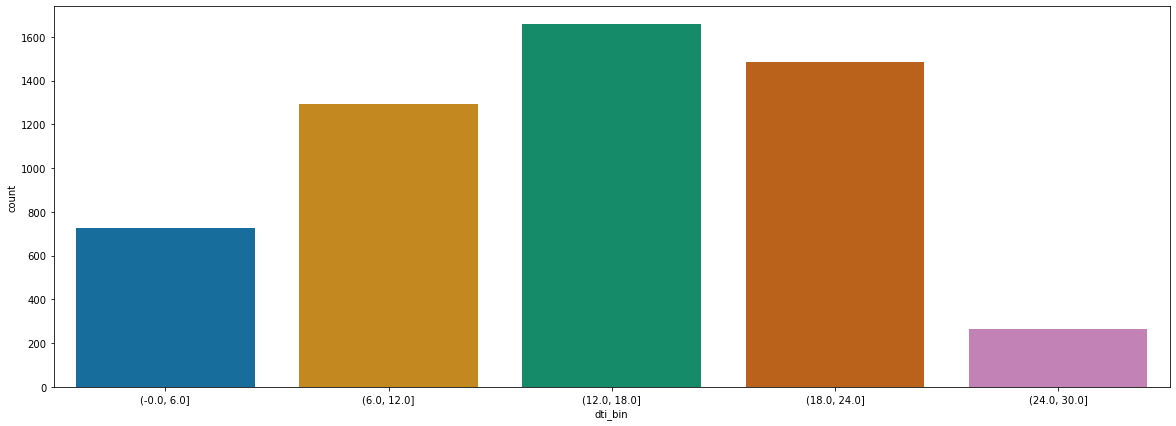

In [55]:
loan_ds['dti_bin'] = pd.cut(loan_ds['dti'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='dti_bin')

Observation : Higher concentration of 'Charged Off' applicants for dti in the range of 12 to 24 (as visible in normal distribution).

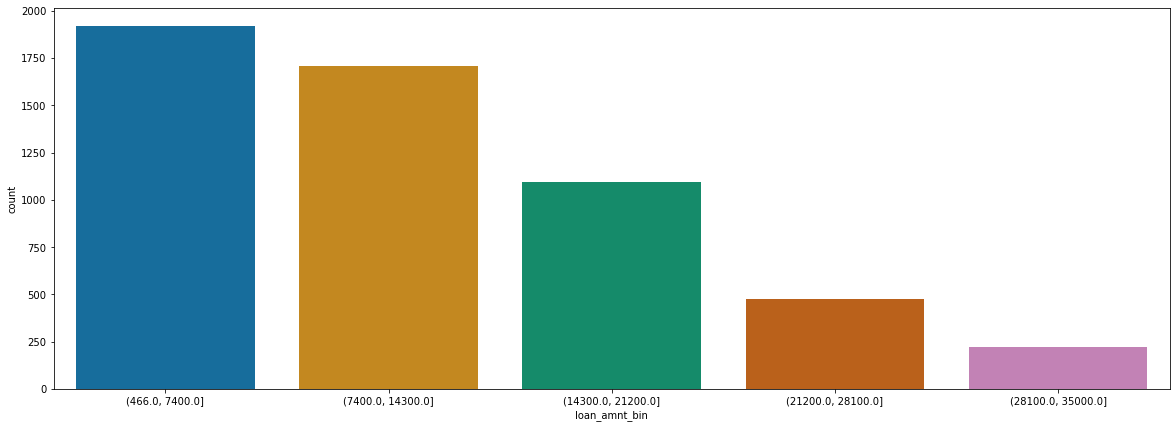

In [56]:
loan_ds['loan_amnt_bin'] = pd.cut(loan_ds['loan_amnt'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='loan_amnt_bin')

Observation : Higher concentration of 'Charged Off' applicants for lower loan amounts. The investers might have assumed low risk while funding smaller loan amounts, however it has resulted into financial losses overall.

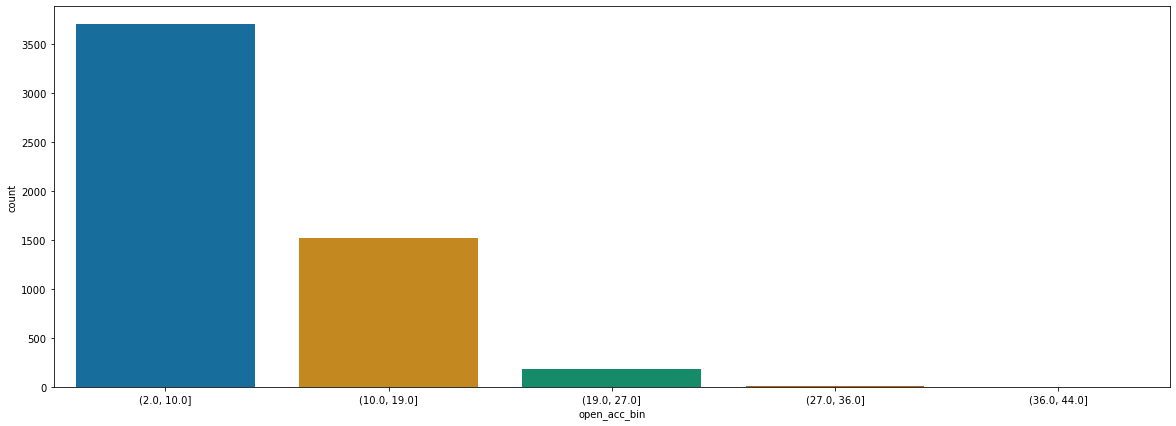

In [57]:
loan_ds['open_acc_bin'] = pd.cut(loan_ds['open_acc'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='open_acc_bin')

Observation : As the number of credit lines increase, defaulter count goes on reducing.

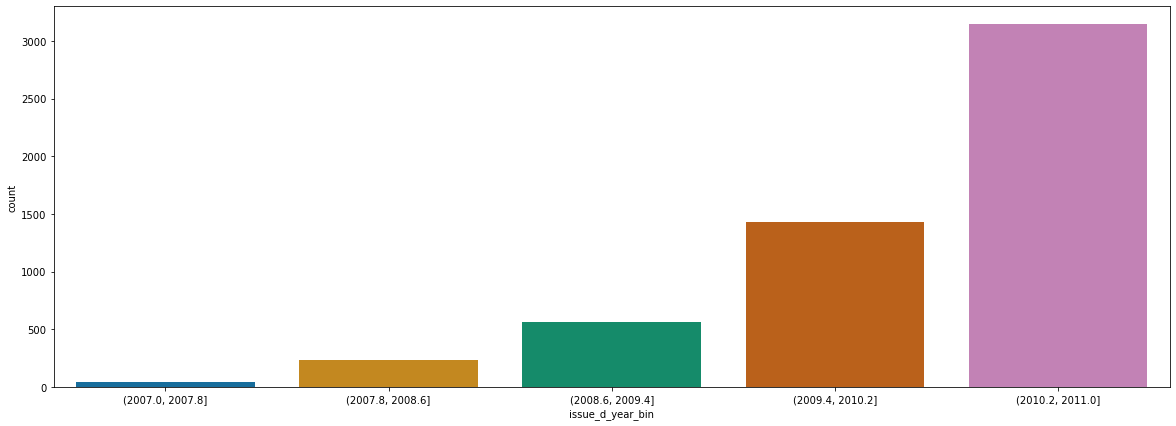

In [58]:
loan_ds['issue_d_year_bin'] = pd.cut(loan_ds['issue_d_year'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='issue_d_year_bin')

Observation : Highest number of defaulters are observed who had been funded between 2010-11. Credibility of applicants before 2010 was higher or there need to be improvements in scrutinizing the eligible applicants.

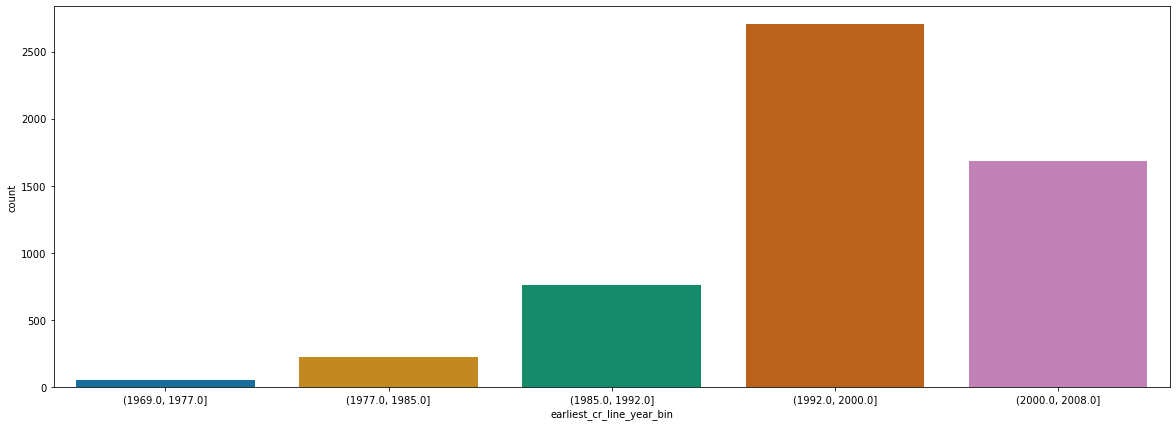

In [59]:
loan_ds['earliest_cr_line_year_bin'] = pd.cut(loan_ds['earliest_cr_line_year'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='earliest_cr_line_year_bin')

Observation : Highest number of defaulters are observed having credit line opening between 1992-2000. 

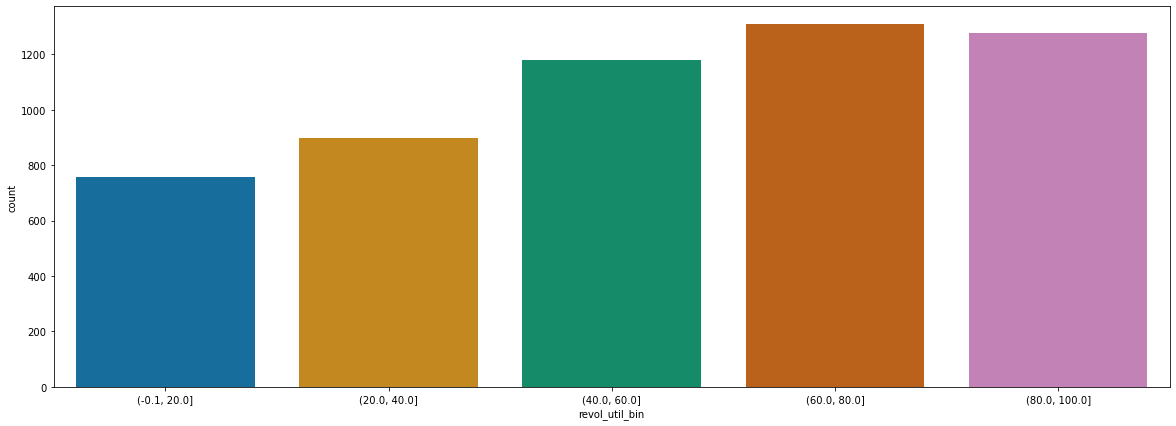

In [78]:
loan_ds['revol_util_bin'] = pd.cut(loan_ds['revol_util'], bins=5,precision =0)
Univar_Analysis_Count_Charged_Off(column_name='revol_util_bin')

Observation : Number of defaulters is increases as the Revolving line utilization rate increases, until it reaches 80. Then the number stays nearly in the same range (~1200)

#### a. Bivariate Analysis

##### Before proceeding with Bivariate analysis, we can quickly replot the Correlation Matrix

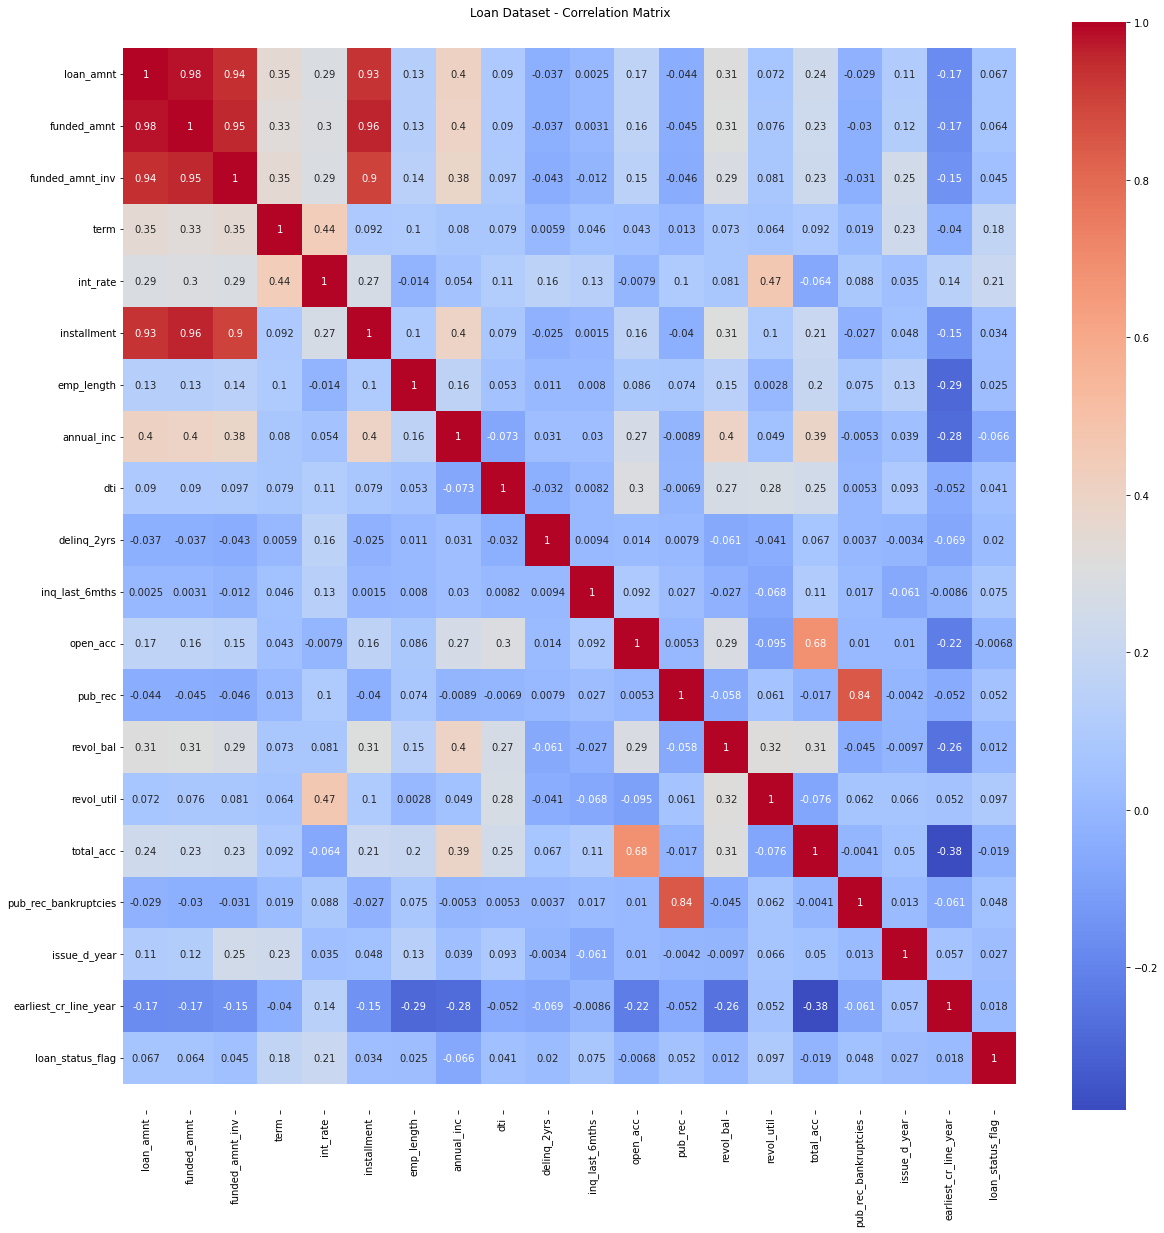

In [71]:
corr_matrix = loan_ds.corr()
plt.figure(figsize=(20,20))

#Heat Map
ax = sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Loan Dataset - Correlation Matrix")
plt.show()

Observation : As we see (displayed earlier during the analysis), there's heavy correlations between the columns loan_amnt, funded_amnt, funded_amnt_inv & installment. This is logical as the first 3 values are interdepedent and installment amount is derived based on funded amount and interest rate.

The influential parameters are term, int_rate, revol_bal & dti which have correlation with multiple columns.

In [61]:
def Bivar_Analysis_heat(ind, col): 
    fig, ax = plt.subplots(figsize=(15,10))
    pt = pd.pivot_table(data=loan_ds, values='loan_status_flag', index=ind, columns=col) #loan_status_flag is numeric
    sns.heatmap(pt, ax=ax, cmap='coolwarm')
    plt.show()

def Bivar_Analysis_violin(ind, col): 
    fig, ax = plt.subplots(figsize=(8,6))
    sns.violinplot(data=loan_ds, x=ind, y=col, hue='loan_status', split=True, figsize=(15,10), ax=ax, hue_order=['Fully Paid','Charged Off'])
    plt.show()

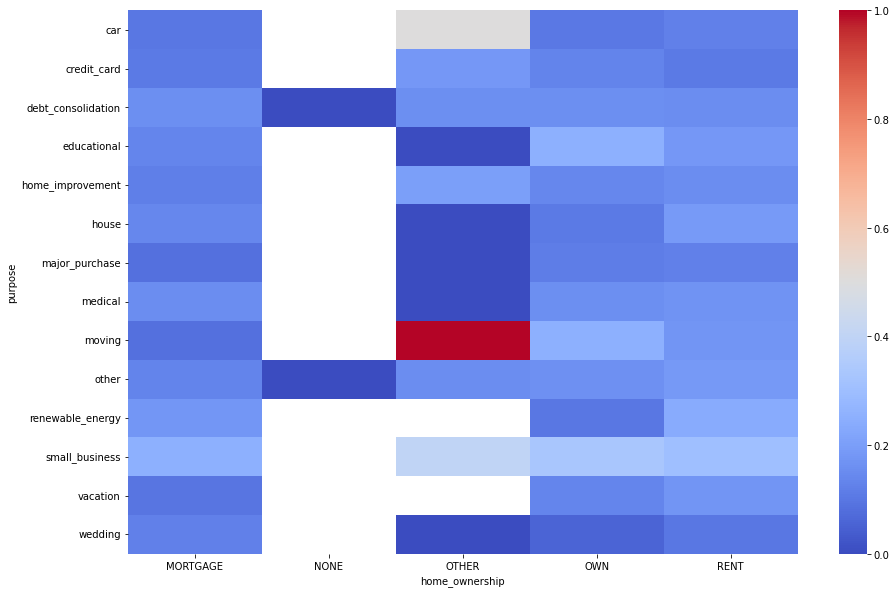

In [62]:
Bivar_Analysis_heat('purpose','home_ownership')

Observation : Relatively lower correlation between purpose and home ownership, with exception of purpose 'moving' and home ownership is 'Other'. This may not really give any conclusive observation though. Few examples where correlation is found are for 'small business' where 'mortgage' or 'own' home owner applicants have chances of being defaulters. This will probably due to uncertainties and variable investment requirements in small business.

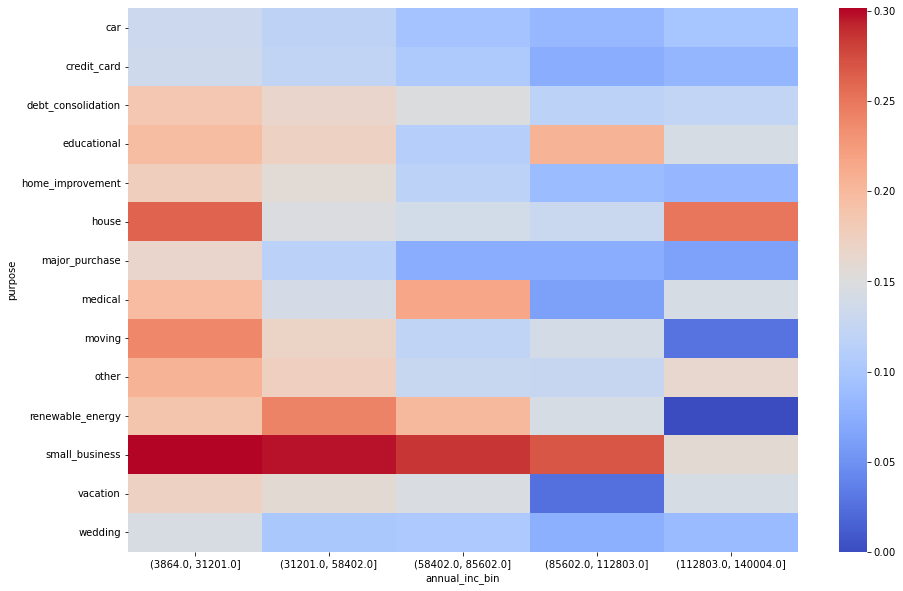

In [69]:
Bivar_Analysis_heat('purpose','annual_inc_bin')

Observation : Applicants who have opted for loan for small business and lower income are the most prone for defaulting. Also, other purposes such as house or moving with lower income group applicants are prone to defaulting.

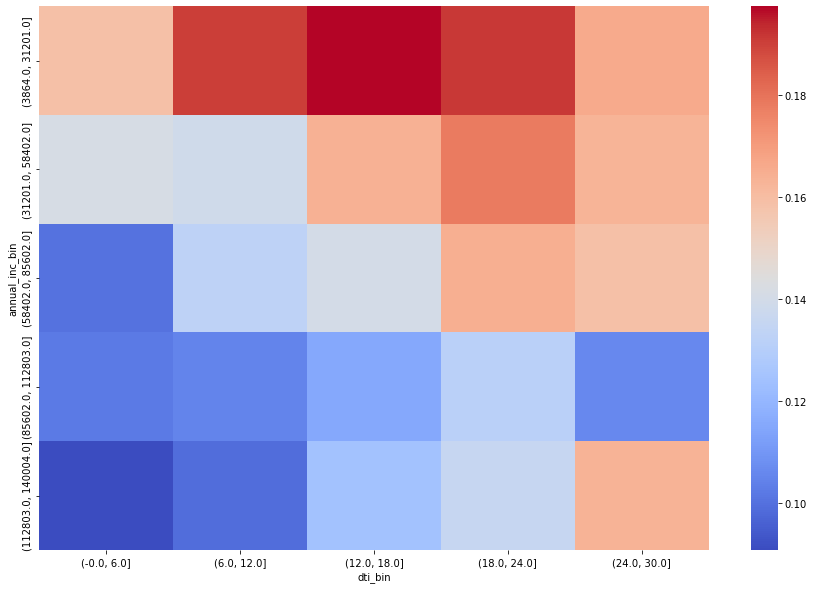

In [76]:
Bivar_Analysis_heat('annual_inc_bin','dti_bin')

Observation : Applicants belonging to high income groups are prone to defaulting if their debt-to-income ratio is in the range of 12 to 24. This would entail that they're heavily spending their income on debts and there's possibility of additional debts beyond current funding, thus risking the repayment to investors.

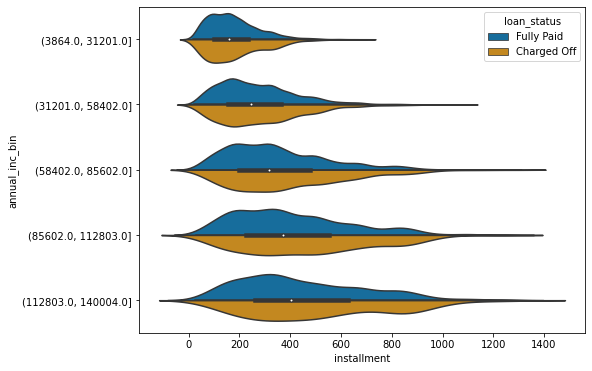

In [63]:
Bivar_Analysis_violin('installment', 'annual_inc_bin')
plt.show()

Observation : As the installment figures increase, risk of defaulting increases. This applies to all the income groups, although the probability of higher installment is lesser for low-income groups. The loan amount funded (thus installment) to them is assumed to be based on their income and hence low-income group have lower installment figures.

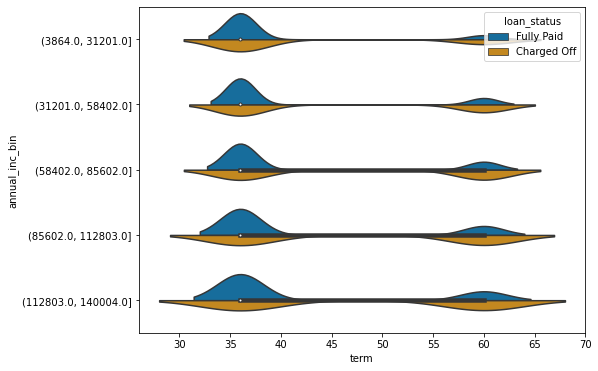

In [64]:
Bivar_Analysis_violin('term', 'annual_inc_bin')
plt.show()

Observation : Loan term has an impact on defaulting for the lower income groups and for 36 Months. As the income increases, term impact reduces. For 60-month term, the defaulting possibility is reduced as the borrowers get more time to adjust their payments.

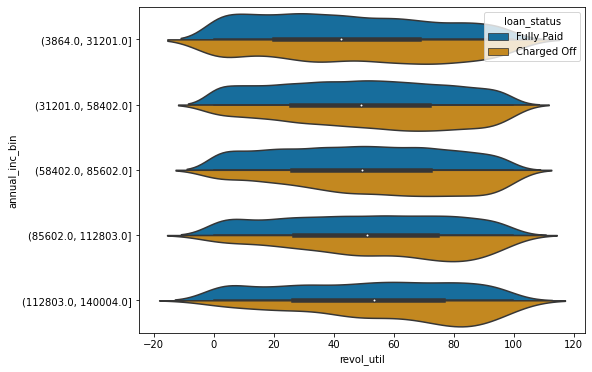

In [65]:
Bivar_Analysis_violin('revol_util', 'annual_inc_bin')
plt.show()

Observation : Possibility of defaulting increases with increased Revolving line utilization rate, across all the income groups. As the borrower uses more credit, his chances of not being able to repay will increase.

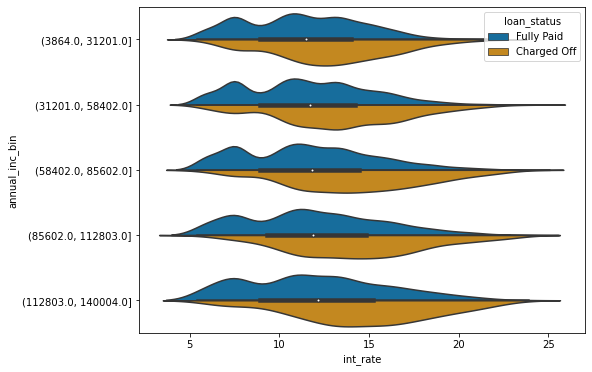

In [73]:
Bivar_Analysis_violin('int_rate', 'annual_inc_bin')
plt.show()

Observation : Significant impact of Interest rate. When the interest rate is between 9%-17%, possibility of defaulting increases irrespective of the income group.